<a href="https://colab.research.google.com/github/patil202/Python_Data-Analysis-Projects/blob/main/Used_Vehicle_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Python Projects/data sets/Used_Vehicle.CSV.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2L/100km,9.0L - 9.5L/100km,43880
1,1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6L/100km,9.0L/100km,36486
2,2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0L/100km,8.6L/100km,40888
3,3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0L/100km,8.6L/100km,44599
4,4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3L/100km,9.1L/100km,46989


In [4]:
df.tail()

,Unnamed: 0,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
24193,24193,2017,Volvo,S90,81000 km,Sedan,NaN,Automatic,AWD,White,NaN,NaN,5 doors,Gasoline,NaN,NaN,34680
24194,24194,2020,Volvo,XC40,92450 km,SUV,2,Automatic,AWD,Black,Black,5.0,5,Gas,NaN,NaN,35898
24195,24195,2017,Volvo,XC90,92000 km,Hatchback,NaN,Automatic,AWD,Grey,NaN,NaN,4 doors,Gasoline,NaN,NaN,38000
24196,24196,2018,Volvo,XC90,67000 km,NaN,NaN,Automatic,AWD,Black,NaN,NaN,4 doors,Gasoline,NaN,NaN,45000
24197,24197,2020,Volvo,XC90,43245 km,NaN,NaN,Automatic,AWD,Grey,NaN,NaN,5 doors,Gasoline,NaN,NaN,55000


In [5]:
df.dtypes

Unnamed: 0            int64
Year                  int64
Make                 object
Model                object
Kilometres           object
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                object
 Highway             object
Price                 int64
dtype: object

In [6]:
df.isna().sum()

Unnamed: 0              0
Year                    0
Make                    0
Model                   0
Kilometres            233
Body Type            1230
 Engine              2062
 Transmission        1344
 Drivetrain          1231
 Exterior Colour     1016
 Interior Colour     7780
 Passengers         12173
 Doors               4587
 Fuel Type            734
 City                6363
 Highway             6363
Price                   0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.shape

(24198, 16)

In [9]:
df.dtypes

Year                  int64
Make                 object
Model                object
Kilometres           object
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                object
 Highway             object
Price                 int64
dtype: object

In [10]:
# Remove rows with missing values in 'City' and 'Highway' columns in the original dataframe
df.dropna(subset=[' City', ' Highway'], inplace=True)
# Extract all the characters before the first 'L' only if 'L' is present
mask = df[' City'].str.contains('L')
df.loc[mask, ' City'] = df.loc[mask, ' City'].str.split('L', n=1, expand=True)[0]

mask = df[' Highway'].str.contains('L')
df.loc[mask, ' Highway'] = df.loc[mask, ' Highway'].str.split('L', n=1, expand=True)[0]

df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2,9.0,43880
1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6,9.0,36486
2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0,8.6,40888
3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0,8.6,44599
4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3,9.1,46989


In [11]:
# Remove non-numeric characters from the 'City' and 'Highway' columns
df[' City'] = df[' City'].str.replace('[^0-9]', '').astype(int)
df[' Highway'] = df[' Highway'].str.replace('[^0-9]', '').astype(int)

print(df.dtypes)

Year                  int64
Make                 object
Model                object
Kilometres           object
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                 int64
 Highway              int64
Price                 int64
dtype: object


<ipython-input-11-158bce9d87e1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[' City'] = df[' City'].str.replace('[^0-9]', '').astype(int)
<ipython-input-11-158bce9d87e1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[' Highway'] = df[' Highway'].str.replace('[^0-9]', '').astype(int)


In [12]:
df.shape

(17835, 16)

In [13]:
df.dropna(subset=['Kilometres'], inplace=True)
df['Kilometres'] = df['Kilometres'].str.replace('km', '').astype(int)
df.dtypes

Year                  int64
Make                 object
Model                object
Kilometres            int64
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                 int64
 Highway              int64
Price                 int64
dtype: object

In [14]:
df.shape

(17662, 16)

In [15]:
df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,122,90,43880
1,2018,Acura,MDX,77127,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,126,90,36486
2,2019,Acura,RDX,33032,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,110,86,40888
3,2020,Acura,RDX,50702,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,110,86,44599
4,2021,Acura,RDX,67950,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,113,91,46989


In [16]:
# Add decimal point to Highway and City columns
df[' Highway'] = df[' Highway'] / 10
df[' City'] = df[' City'] / 10


In [17]:
df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2,9.0,43880
1,2018,Acura,MDX,77127,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6,9.0,36486
2,2019,Acura,RDX,33032,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0,8.6,40888
3,2020,Acura,RDX,50702,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0,8.6,44599
4,2021,Acura,RDX,67950,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3,9.1,46989


In [18]:
# iterate over columns with object datatype
for col in df.select_dtypes(include='object'):
    # count the unique number of values
    unique_count = df[col].nunique()
    # print the result
    print(f'The number of unique values in the "{col}" column is: {unique_count}')

The number of unique values in the "Make" column is: 39
The number of unique values in the "Model" column is: 489
The number of unique values in the "Body Type" column is: 26
The number of unique values in the " Engine" column is: 951
The number of unique values in the " Transmission" column is: 20
The number of unique values in the " Drivetrain" column is: 6
The number of unique values in the " Exterior Colour" column is: 1258
The number of unique values in the " Interior Colour" column is: 15
The number of unique values in the " Doors" column is: 4
The number of unique values in the " Fuel Type" column is: 11


In [19]:
def fetch_model(text):
    if 'MDX' in text:
        return 'MDX'
    elif 'TSX' in text:
        return 'TSX'
    elif 'Grand' in text:
        return 'Grand'
    elif 'Civic' in text:
        return 'Civic'
    elif 'RDX' in text:
        return 'RDX'
    elif 'ILX' in text:
        return 'ILX'
    elif 'TLX' in text:
        return 'TLX'
    else:
        return 'Other Model'

In [20]:
df['Model'] = df['Model'].apply(fetch_model)

<Axes: >

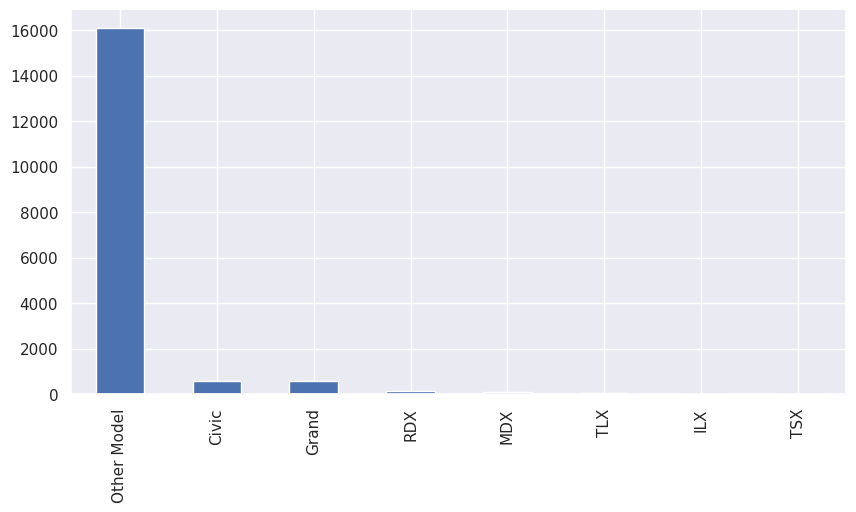

In [21]:
plt.figure(figsize=(10,5))
df['Model'].value_counts().plot(kind='bar')

In [22]:
df.dtypes

Year                  int64
Make                 object
Model                object
Kilometres            int64
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City               float64
 Highway            float64
Price                 int64
dtype: object

In [23]:
df.drop(columns=[' Exterior Colour', ' Interior Colour'], inplace=True)
df.shape

(17662, 14)

In [24]:
df.dtypes

Year               int64
Make              object
Model             object
Kilometres         int64
Body Type         object
 Engine           object
 Transmission     object
 Drivetrain       object
 Passengers      float64
 Doors            object
 Fuel Type        object
 City            float64
 Highway         float64
Price              int64
dtype: object

In [25]:
df.Make.unique()

array(['Acura', 'Alfa Romeo', 'Audi', 'Bentley', 'Volvo', 'BMW',
       'Aston Martin', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Maserati', 'Porsche', 'Mazda', 'McLaren', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Scion', 'Subaru', 'Dodge', 'Ferrari', 'Fiat',
       'Ford', 'Genesis', 'GMC', 'Honda', 'Hummer', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Nissan', 'Polestar',
       'Rolls-Royce', 'Suzuki', 'Volkswagen'], dtype=object)

# Make the segmentation for car brands

In [26]:
def segment_make(make):
    if make in ['Acura', 'Alfa Romeo', 'Audi', 'Bentley', 'BMW', 'Cadillac', 'Genesis', 'Infiniti', 'Jaguar', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati', 'McLaren', 'Mercedes-Benz', 'Porsche', 'Rolls-Royce', 'Tesla']:
        return 'Luxury'
    elif make in ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Jeep', 'Ram']:
        return 'Mainstream'
    elif make in ['Ferrari', 'Lotus']:
        return 'Sports'
    elif make in ['Honda', 'Hyundai', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Subaru', 'Toyota', 'Volkswagen']:
        return 'Value'
    else:
        return 'Other'

In [27]:
df['Make'] = df['Make'].apply(segment_make)

<Axes: >

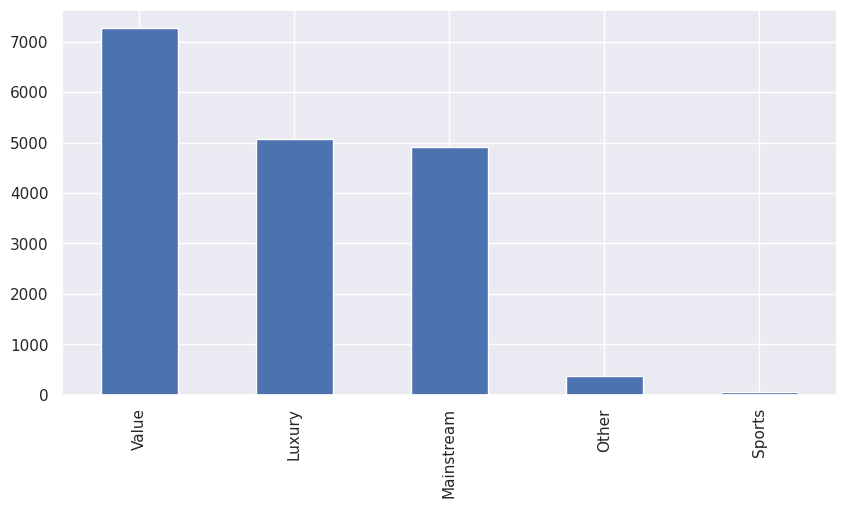

In [28]:
plt.figure(figsize=(10,5))
df['Make'].value_counts().plot(kind='bar')

# Segment body type

In [29]:
df['Body Type'].unique()

array(['SUV', 'Sedan', 'Coupe', 'Convertible', 'Hatchback', nan, 'Wagon',
       'Roadster', 'Station Wagon', 'Truck', 'Truck Extended Cab',
       'Extended Cab', 'Crew Cab', 'Regular Cab', 'Compact',
       'Truck Crew Cab', 'Super Cab', 'Minivan', 'Cabriolet',
       'Van Regular', 'Super Crew', 'Quad Cab', 'Truck Super Cab',
       'Van Extended', 'Truck Double Cab', 'Truck King Cab',
       'Truck Long Crew Cab'], dtype=object)

In [30]:
# Define the body type segments
suv = ['SUV']
sedan = ['Sedan', 'Coupe', 'Convertible']
hatchback = ['Hatchback']
wagon = ['Wagon', 'Station Wagon']
truck = ['Truck', 'Truck Extended Cab', 'Extended Cab', 'Crew Cab',
         'Regular Cab', 'Truck Crew Cab', 'Super Cab', 'Quad Cab',
         'Truck Super Cab', 'Truck Double Cab', 'Truck King Cab',
         'Truck Long Crew Cab']
van = ['Van Regular', 'Van Extended']
minivan = ['Minivan']
roadster = ['Roadster']
cabriolet = ['Cabriolet']
super_crew = ['Super Crew']
compact = ['Compact']

In [31]:

# Create a dictionary to map each body type to its corresponding segment

body_type_segments = {}
for body_type in df['Body Type'].unique():
    if body_type in suv:
        body_type_segments[body_type] = 'SUV'
    elif body_type in sedan:
        body_type_segments[body_type] = 'Sedan'
    elif body_type in hatchback:
        body_type_segments[body_type] = 'Hatchback'
    elif body_type in wagon:
        body_type_segments[body_type] = 'Wagon'
    elif body_type in truck:
        body_type_segments[body_type] = 'Truck'
    elif body_type in van:
        body_type_segments[body_type] = 'Van'
    elif body_type in minivan:
        body_type_segments[body_type] = 'Minivan'
    elif body_type in roadster:
        body_type_segments[body_type] = 'Roadster'
    elif body_type in cabriolet:
        body_type_segments[body_type] = 'Cabriolet'
    elif body_type in super_crew:
        body_type_segments[body_type] = 'Super Crew'
    elif body_type in compact:
        body_type_segments[body_type] = 'Compact'
    else:
        body_type_segments[body_type] = 'Other'

In [32]:
# Map the body type segments to the dataframe
df['Body Type'] = df['Body Type'].map(body_type_segments)

<Axes: >

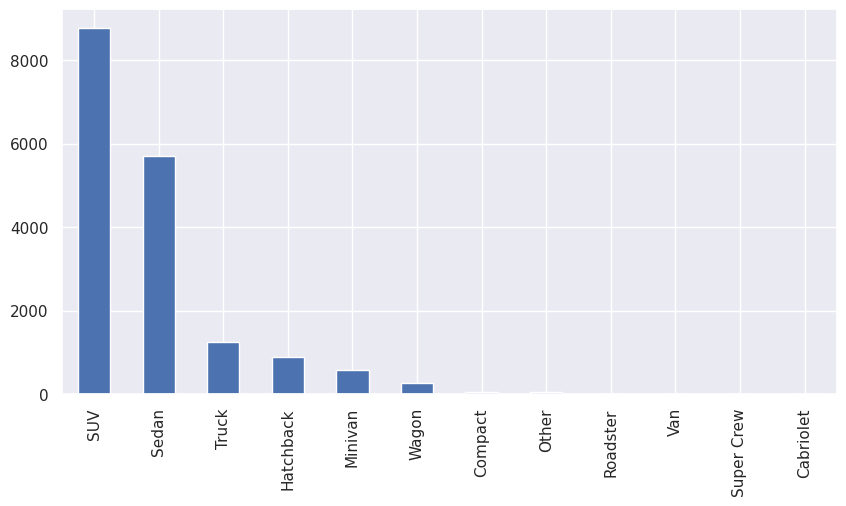

In [33]:
plt.figure(figsize=(10,5))
df['Body Type'].value_counts().plot(kind='bar')

# Segment Transmission

In [34]:
df[' Transmission'].unique()

array(['9 Speed Automatic', '10 Speed Automatic', nan, 'Automatic',
       '6 Speed Manual', '8 Speed Automatic', '6 Speed Automatic',
       '8 Speed Automatic with auto-shift', '5 Speed Automatic',
       '5 Speed Manual', '4 Speed Automatic', 'Manual',
       '7 Speed Automatic with auto-shift',
       '6 Speed Automatic with auto-shift', 'Sequential',
       '7 Speed Automatic', 'CVT', '1 Speed Automatic', '7 Speed Manual',
       '5 Speed Automatic with auto-shift', 'F1 Transmission'],
      dtype=object)

In [35]:
def segment_transmission(transmission):
    if transmission in ['Automatic', 'CVT', '1 Speed Automatic']:
        return 'Automatic'
    elif transmission in ['6 Speed Manual', '5 Speed Manual', '7 Speed Manual']:
        return 'Manual'
    elif transmission in ['9 Speed Automatic', '10 Speed Automatic', '8 Speed Automatic', '7 Speed Automatic', '5 Speed Automatic', '4 Speed Automatic']:
        return 'Traditional Automatic'
    elif transmission in ['8 Speed Automatic with auto-shift', '6 Speed Automatic with auto-shift', '7 Speed Automatic with auto-shift', '5 Speed Automatic with auto-shift']:
        return 'Automated Manual'
    elif transmission == 'Sequential':
        return 'Semi-Automatic'
    elif transmission == 'F1 Transmission':
        return 'Automated Single-Clutch'
    else:
        return 'Unknown'

df['Transmission'] = df[' Transmission'].apply(segment_transmission)

<Axes: >

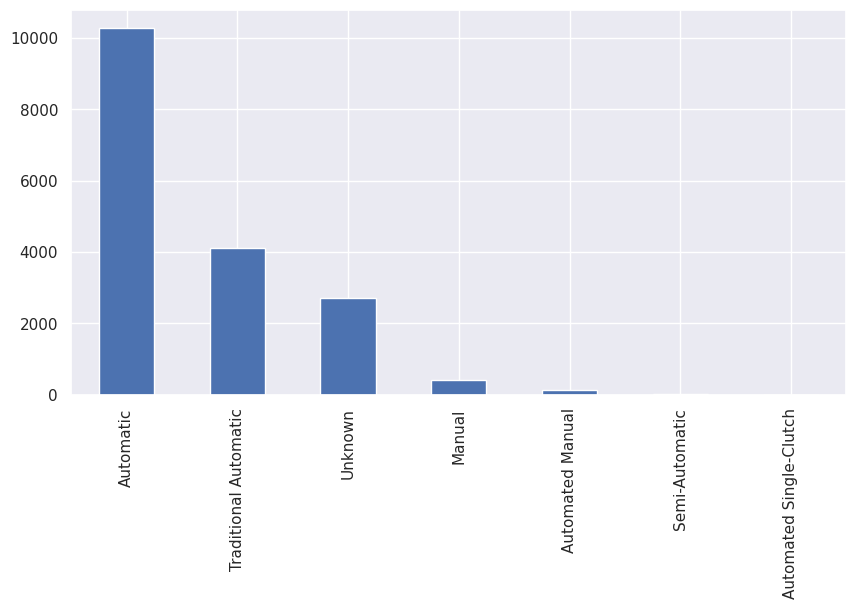

In [36]:
plt.figure(figsize=(10,5))
df['Transmission'].value_counts().plot(kind='bar')

In [37]:
df.dtypes

Year               int64
Make              object
Model             object
Kilometres         int64
Body Type         object
 Engine           object
 Transmission     object
 Drivetrain       object
 Passengers      float64
 Doors            object
 Fuel Type        object
 City            float64
 Highway         float64
Price              int64
Transmission      object
dtype: object

In [38]:
df.drop(columns=['Transmission'], inplace = True)
df.shape

(17662, 14)

# Drop Engine column

In [39]:
df.drop(columns=[' Engine'], inplace=True)
df.shape

(17662, 13)

In [40]:
df.head()

,Year,Make,Model,Kilometres,Body Type,Transmission,Drivetrain,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Luxury,MDX,53052,SUV,9 Speed Automatic,AWD,NaN,NaN,Gas,12.2,9.0,43880
1,2018,Luxury,MDX,77127,SUV,9 Speed Automatic,AWD,NaN,NaN,Gas,12.6,9.0,36486
2,2019,Luxury,RDX,33032,SUV,10 Speed Automatic,AWD,5.0,4,Premium Unleaded,11.0,8.6,40888
3,2020,Luxury,RDX,50702,SUV,NaN,AWD,NaN,NaN,Gas,11.0,8.6,44599
4,2021,Luxury,RDX,67950,SUV,NaN,AWD,NaN,NaN,Gas,11.3,9.1,46989


# Exploratory Data Analysis

In [46]:
# iterate over columns with object datatype
for col in df.select_dtypes(include='object'):
    # count the unique number of values
    unique_count = df[col].nunique()
    # print the result
    print(f'The number of unique values in the "{col}" column is: {unique_count}')

The number of unique values in the "Make" column is: 5
The number of unique values in the "Model" column is: 8
The number of unique values in the "Body Type" column is: 12
The number of unique values in the " Transmission" column is: 20
The number of unique values in the " Drivetrain" column is: 6
The number of unique values in the " Doors" column is: 4
The number of unique values in the " Fuel Type" column is: 11


ValueError: ignored

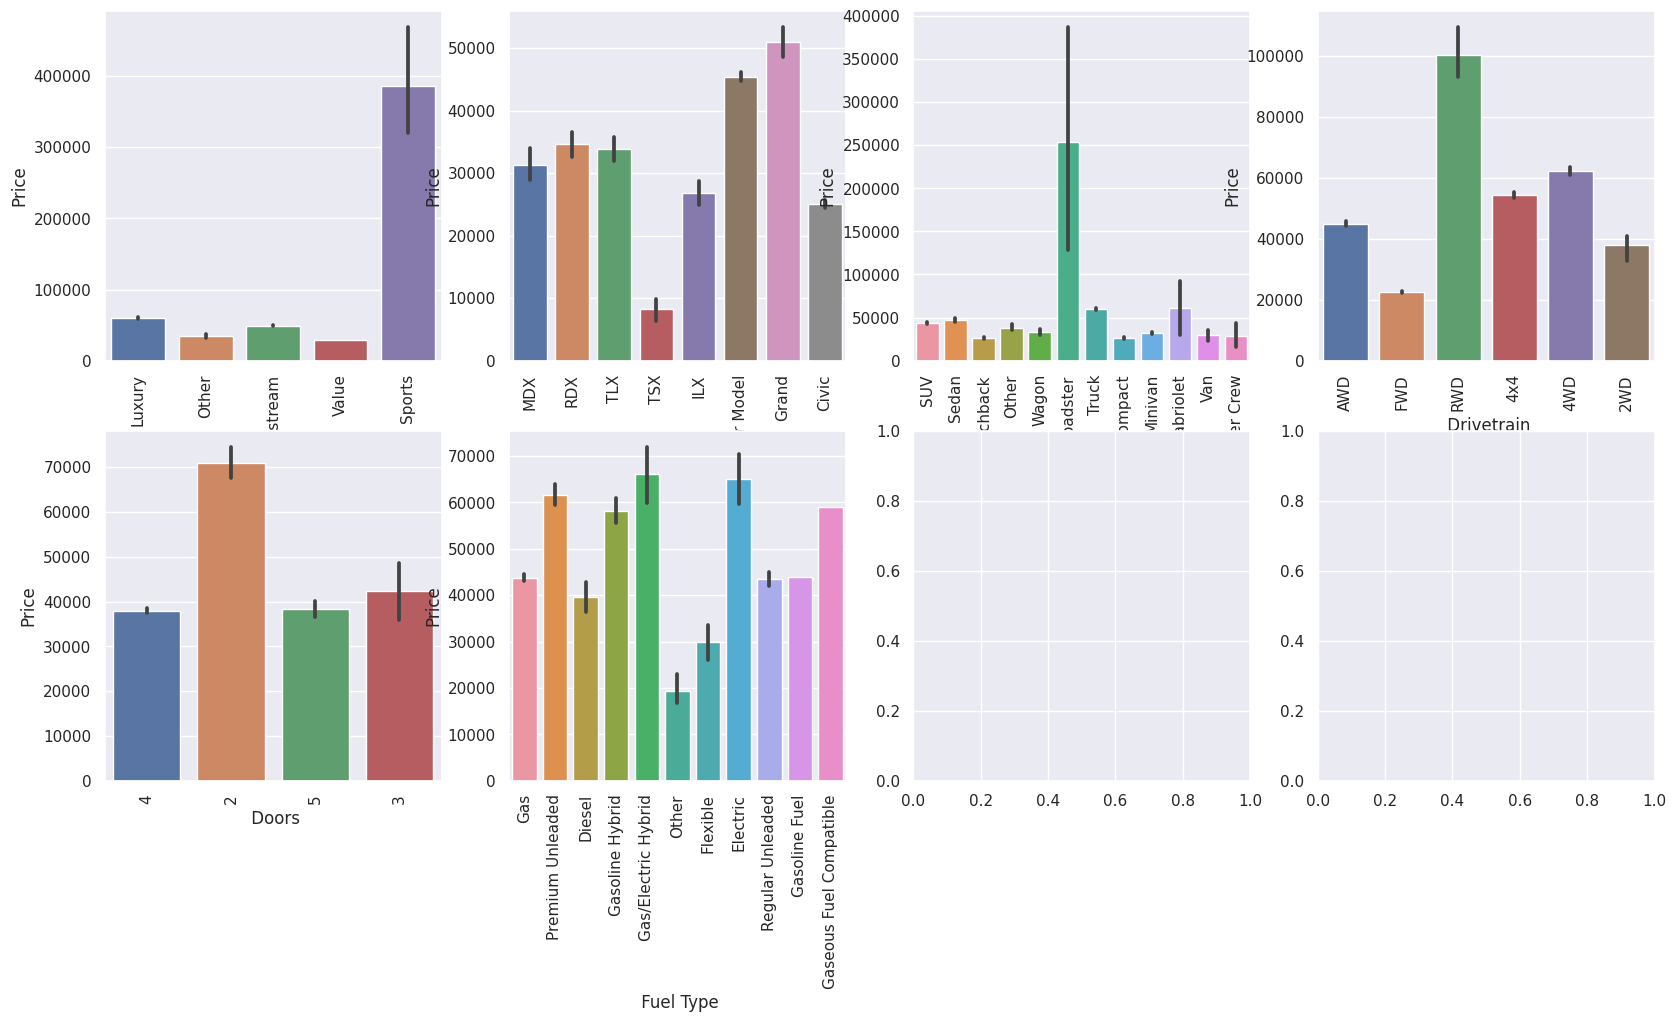

In [53]:
# list of categorical variables to plot
cat_vars = ['Make', 'Model', 'Body Type', ' Drivetrain', ' Doors', ' Fuel Type', 'Transmission']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# remove the eighth subplot
fig.delaxes(axs[7])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

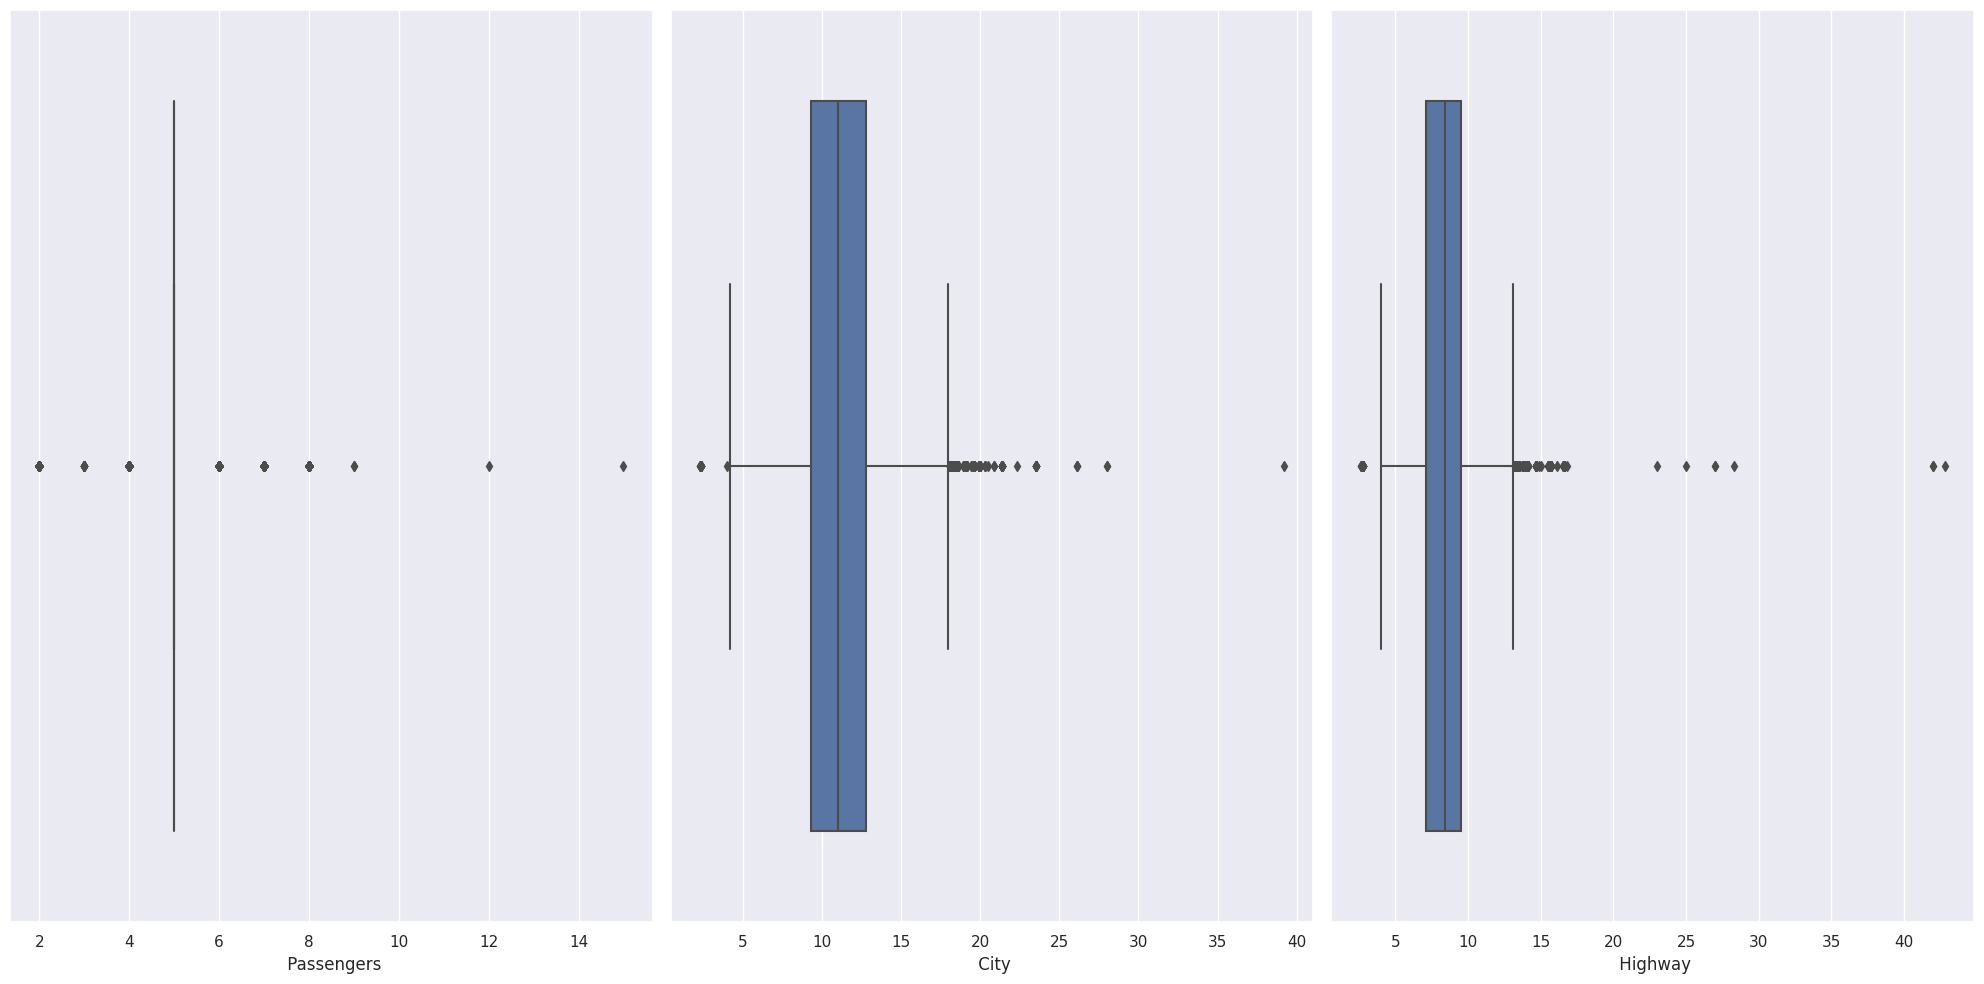

In [54]:
num_vars = [' Passengers', ' City', ' Highway']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

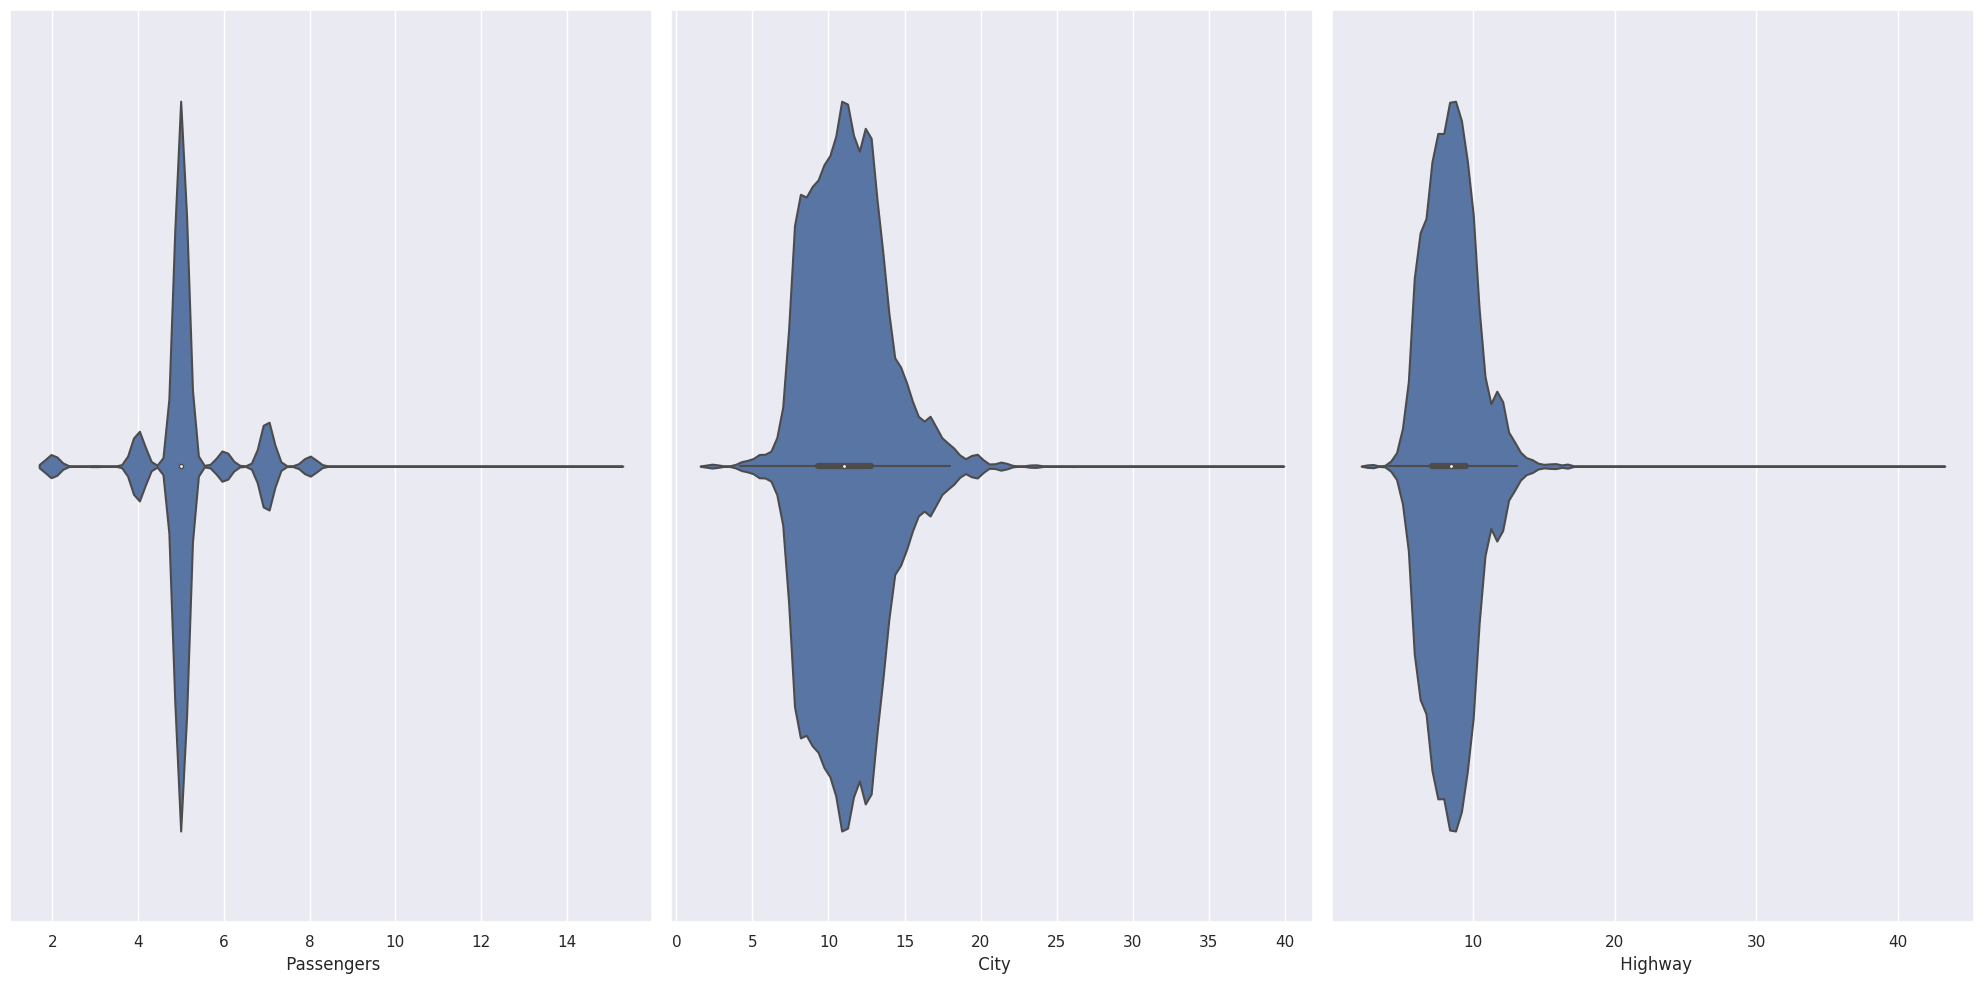

In [55]:
num_vars = [' Passengers', ' City', ' Highway']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

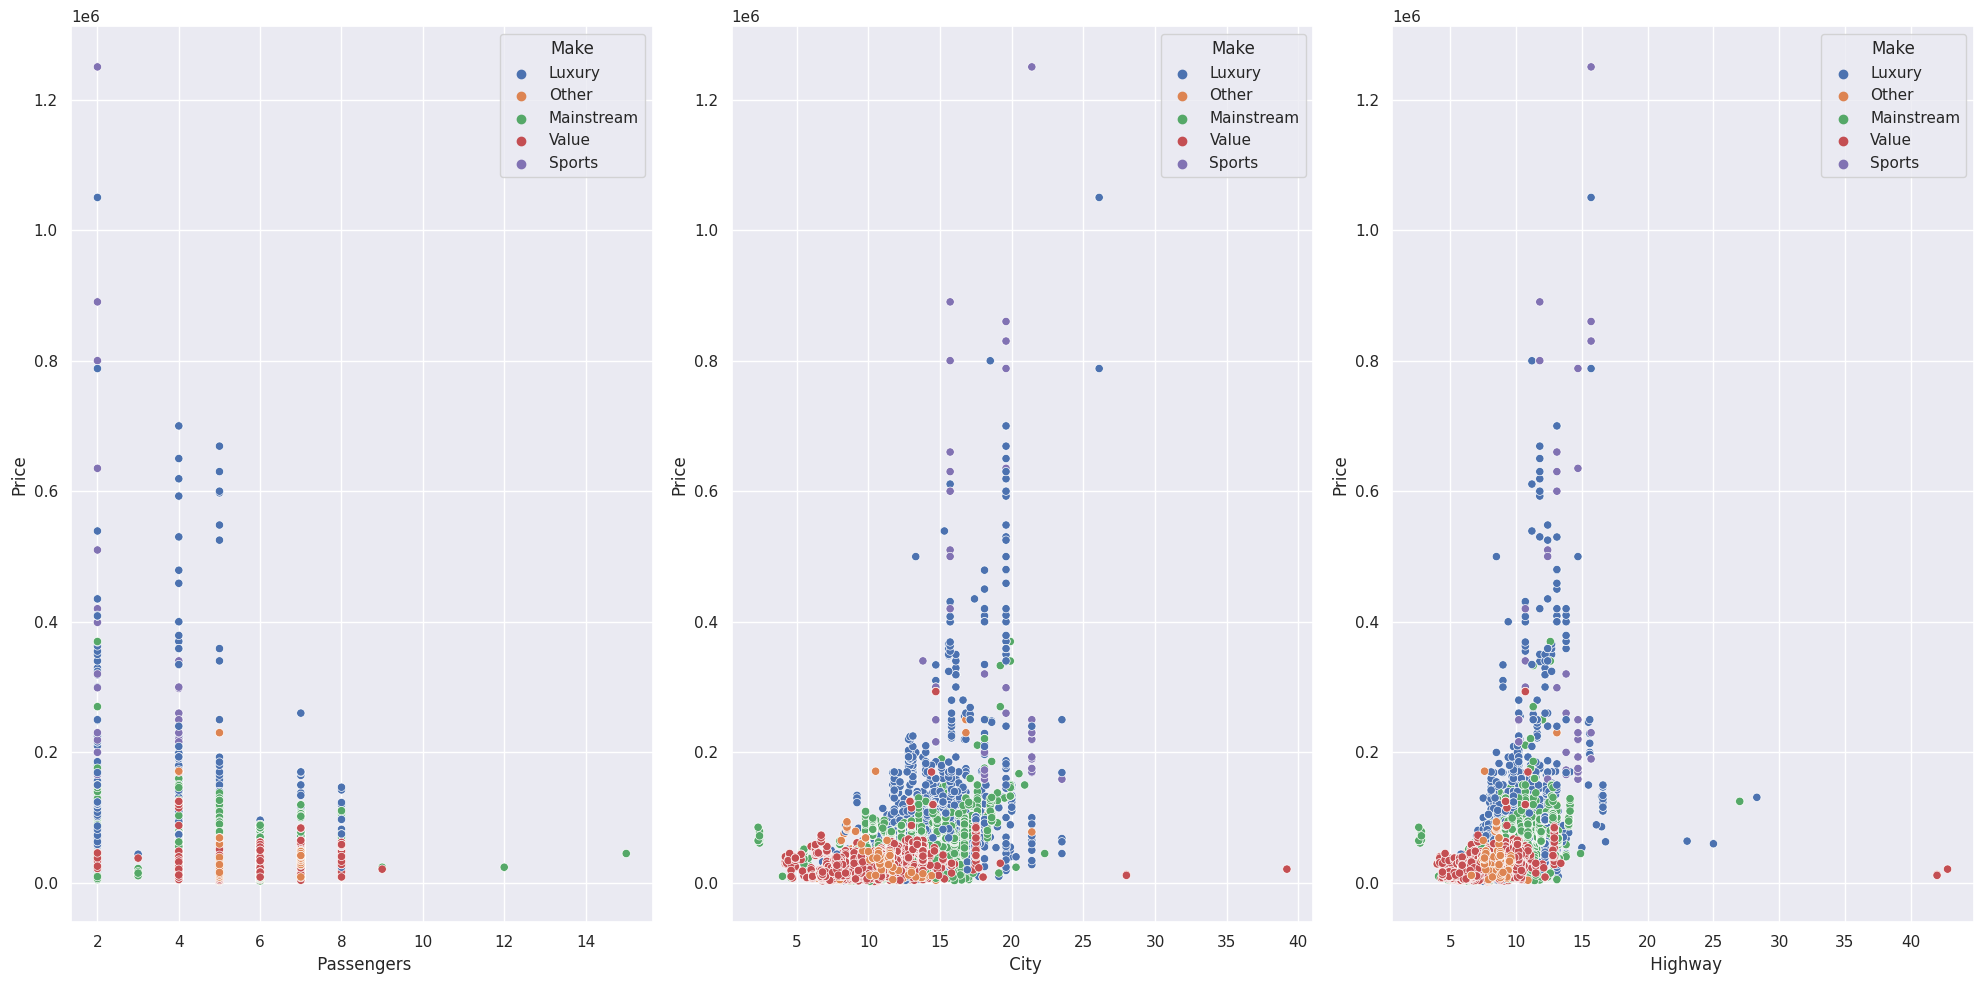

In [56]:
num_vars = [' Passengers', ' City', ' Highway']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Make', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

<ipython-input-57-9651c3b45a0e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Price', hue='Make', data=df, ci=None, estimator='mean', alpha=0.7)


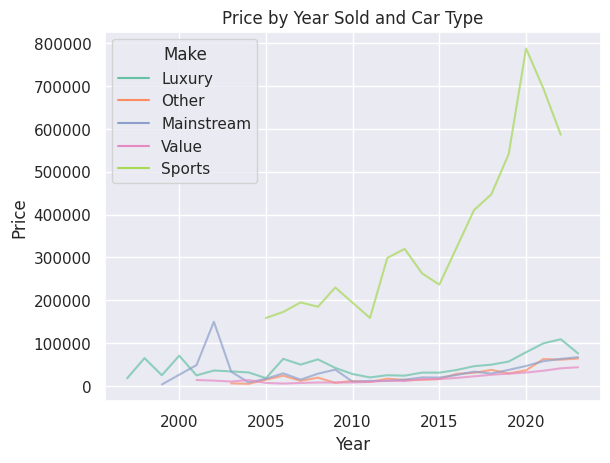

In [57]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year', y='Price', hue='Make', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Car Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

# Data Preprocessing Part 2

In [58]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

 Passengers      46.342430
 Doors           19.805232
 Transmission     4.642736
 Drivetrain       2.276073
dtype: float64

In [59]:
df.drop(columns=[' Passengers'], inplace=True)
df[' Doors'] = df[' Doors'].fillna(df[' Doors'].median())
df.dropna(subset=[' Drivetrain'], inplace=True)
df.shape

(17260, 12)

# Label Encoding for Object datatype

In [60]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Make: ['Luxury' 'Other' 'Mainstream' 'Value' 'Sports']
Model: ['MDX' 'RDX' 'TLX' 'TSX' 'ILX' 'Other Model' 'Grand' 'Civic']
Body Type: ['SUV' 'Sedan' 'Hatchback' 'Other' 'Wagon' 'Roadster' 'Truck' 'Compact'
 'Minivan' 'Cabriolet' 'Van' 'Super Crew']
 Transmission: ['9 Speed Automatic' '10 Speed Automatic' nan 'Automatic' '6 Speed Manual'
 '8 Speed Automatic' '6 Speed Automatic'
 '8 Speed Automatic with auto-shift' '5 Speed Automatic' '5 Speed Manual'
 '4 Speed Automatic' 'Manual' '7 Speed Automatic with auto-shift'
 '6 Speed Automatic with auto-shift' 'Sequential' '7 Speed Automatic'
 'CVT' '1 Speed Automatic' '7 Speed Manual'
 '5 Speed Automatic with auto-shift' 'F1 Transmission']
 Drivetrain: ['AWD' 'FWD' 'RWD' '4x4' '4WD' '2WD']
 Doors: [4.0 '4' '2' '5' '3']
 Fuel Type: ['Gas' 'Premium Unleaded' 'Diesel' 'Gasoline Hybrid' 'Gas/Electric Hybrid'
 'Other' 'Flexible' 'Electric' 'Regular Unleaded' 'Gasoline Fuel'
 'Gaseous Fuel Compatible']


In [61]:
df[' Doors'] = df[' Doors'].astype(float)

In [62]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Make: [0 2 1 4 3]
Model: [3 5 6 7 2 4 1 0]
Body Type: [ 6  7  2  4 11  5  9  1  3  0 10  8]
 Transmission: [14  1 20 15  8 12  6 13  3  5  2 18 10  7 19  9 16  0 11  4 17]
 Drivetrain: [3 4 5 2 1 0]
 Fuel Type: [ 3  9  0  7  4  8  2  1 10  6  5]


In [63]:
df.dtypes

Year               int64
Make               int64
Model              int64
Kilometres         int64
Body Type          int64
 Transmission      int64
 Drivetrain        int64
 Doors           float64
 Fuel Type         int64
 City            float64
 Highway         float64
Price              int64
dtype: object

# Remove Outlier using Z-Score

In [64]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

In [65]:
selected_cols = [' City', ' Highway']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(17027, 12)

In [66]:
#dataframe before the outlier removed
df.shape

(17260, 12)

<Axes: >

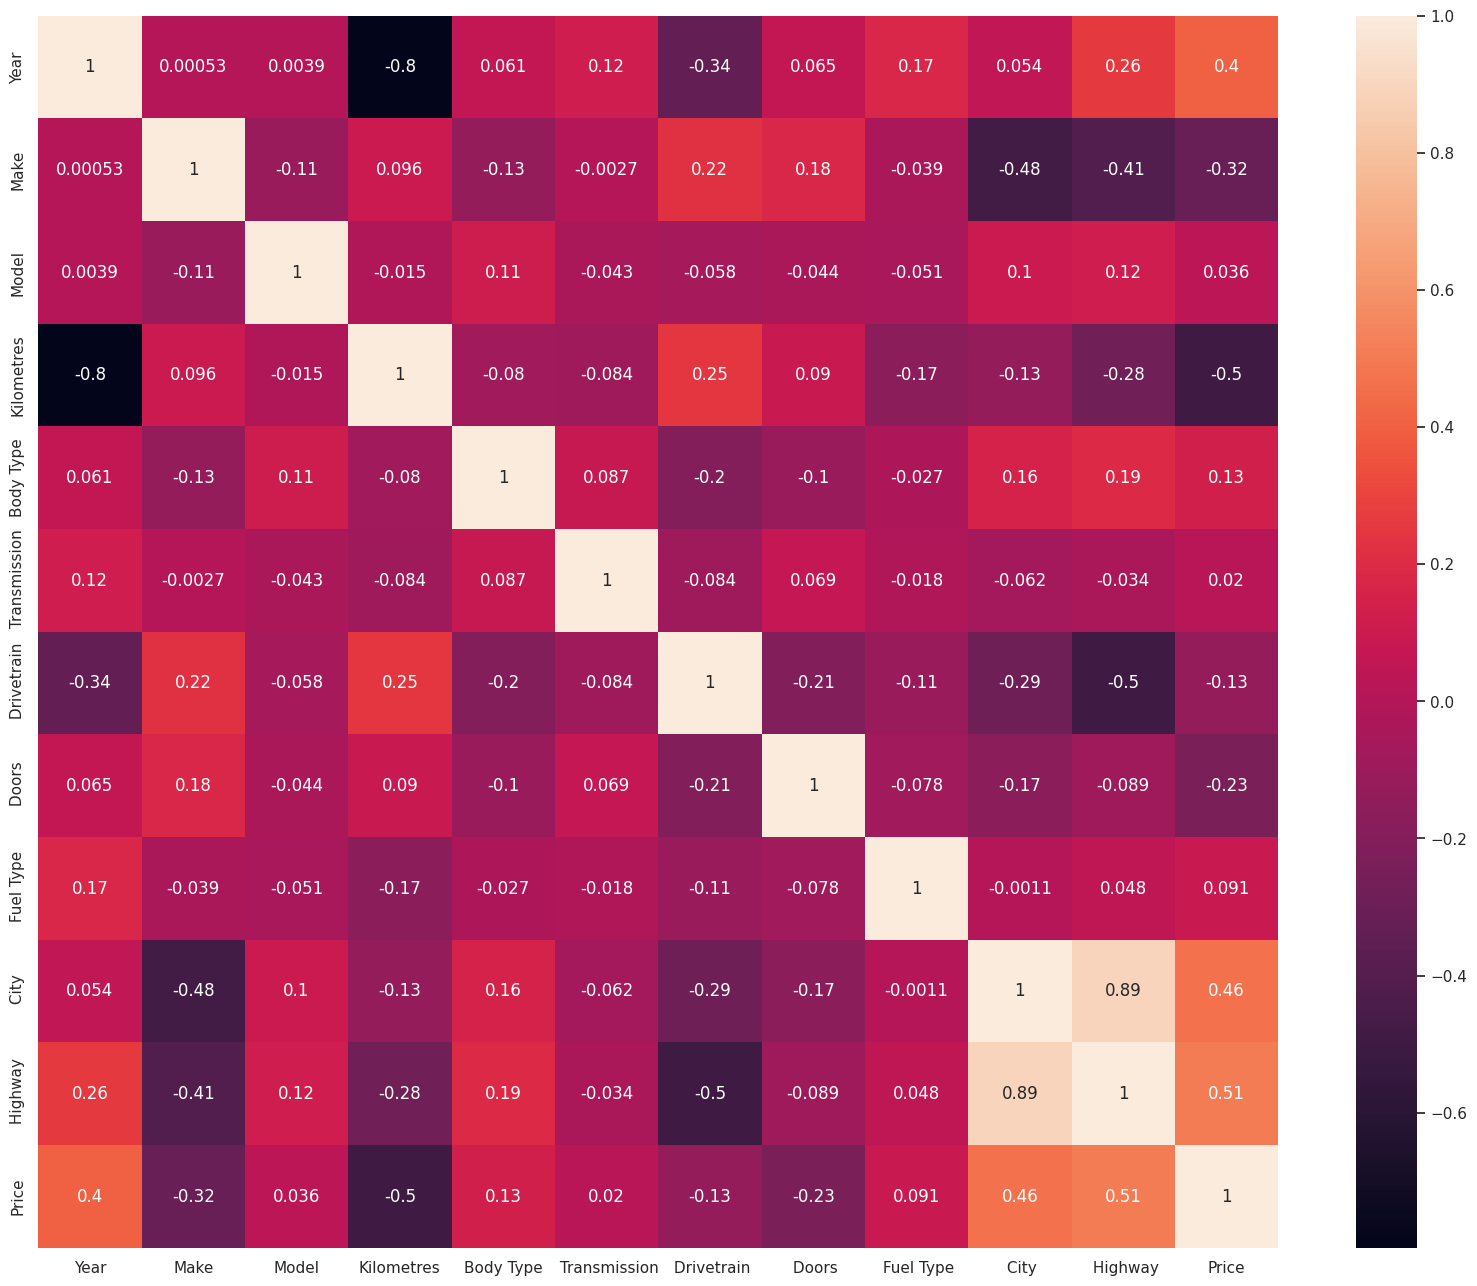

In [67]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

# Machine Learning Model Building


In [68]:
X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

In [69]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [72]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=8)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=8, random_state=0)

In [73]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 7099.432210227598
MAPE is 0.17280168662089967
MSE is 328145461.0663096
R2 score is 0.7687349408622298
RMSE score is 18114.78570301922


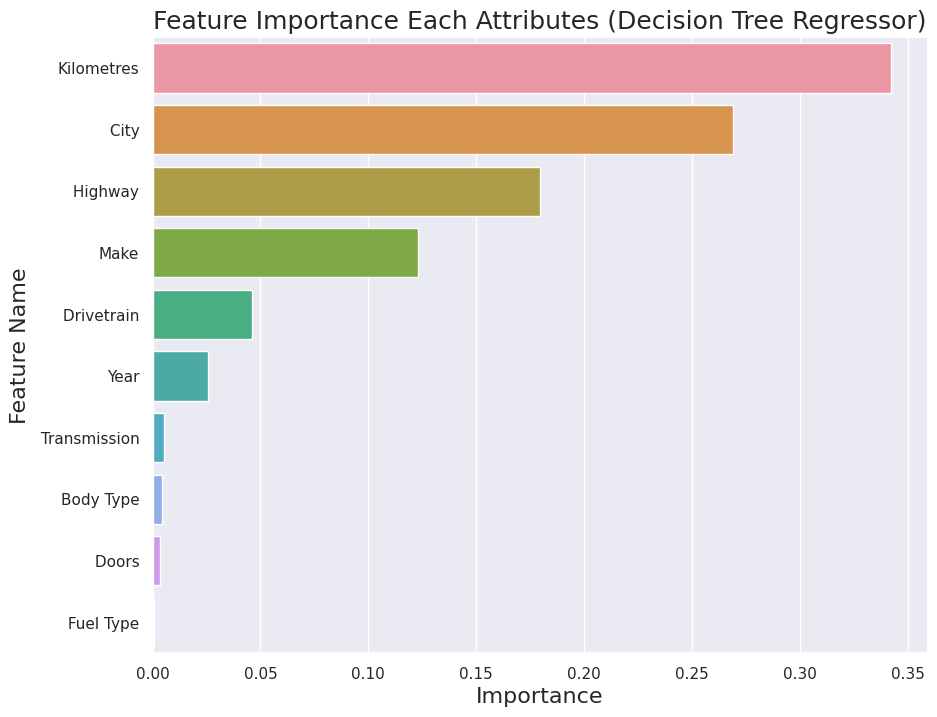

In [74]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [79]:
# install pip 
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 12.9 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


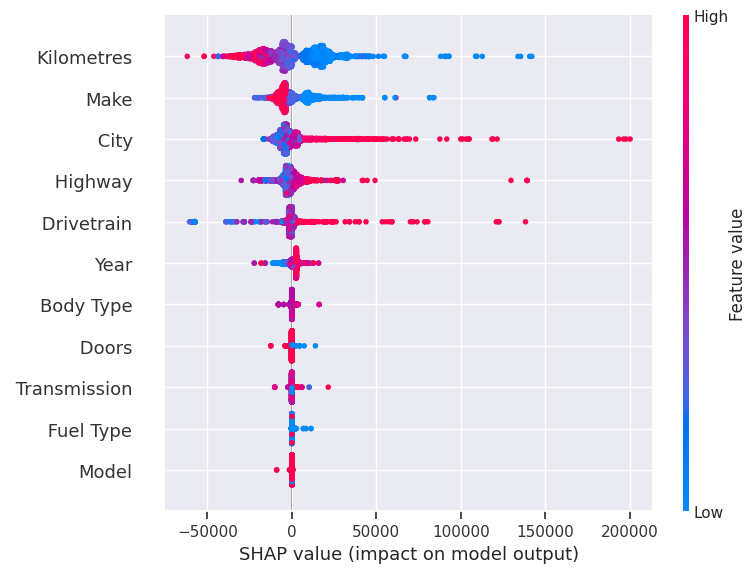

In [80]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

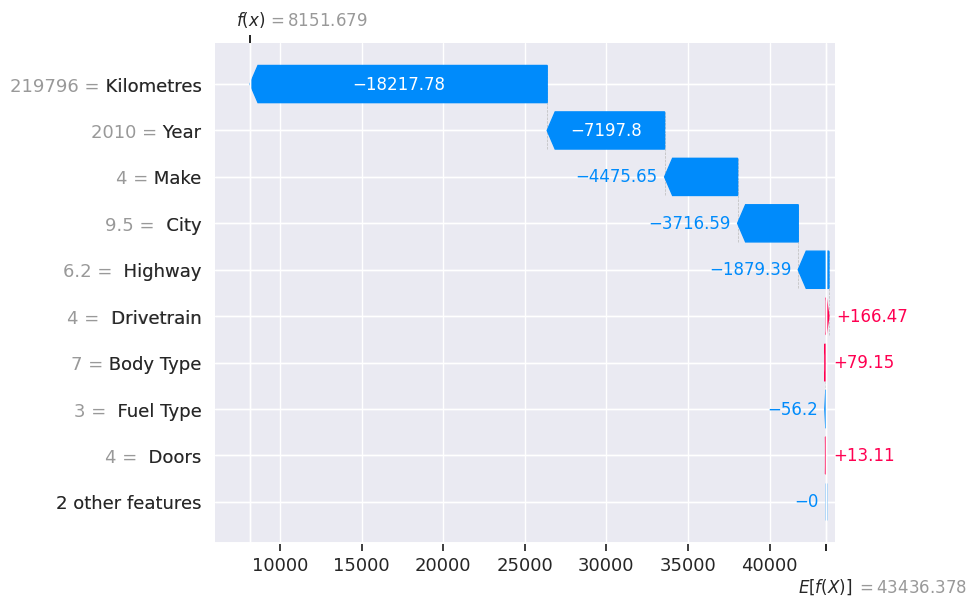

In [81]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [83]:
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=2, min_samples_leaf=1, 
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', random_state=0)

In [87]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 6004.726227587214
MAPE is 0.1608018013464671
MSE is 236750644.97200045
R2 score is 0.8331467035002171
RMSE score is 15386.703512188713


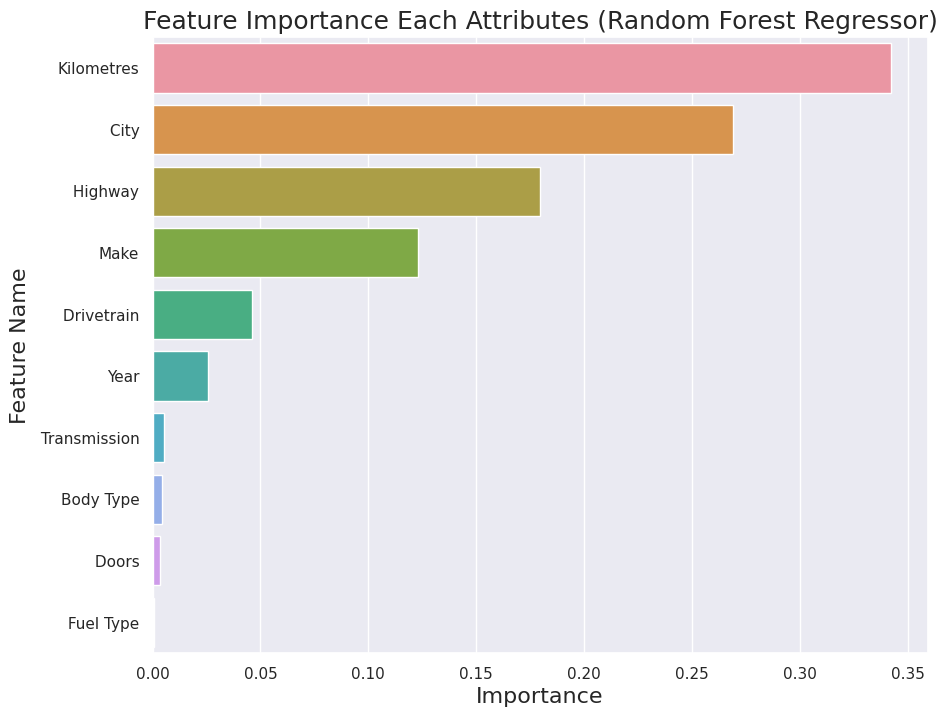

In [88]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


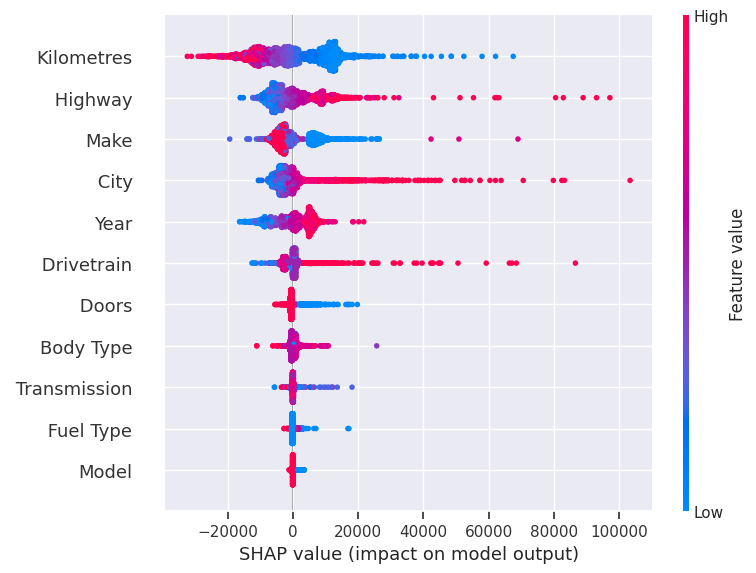

In [89]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

100%|===================| 3397/3406 [01:13<00:00]       

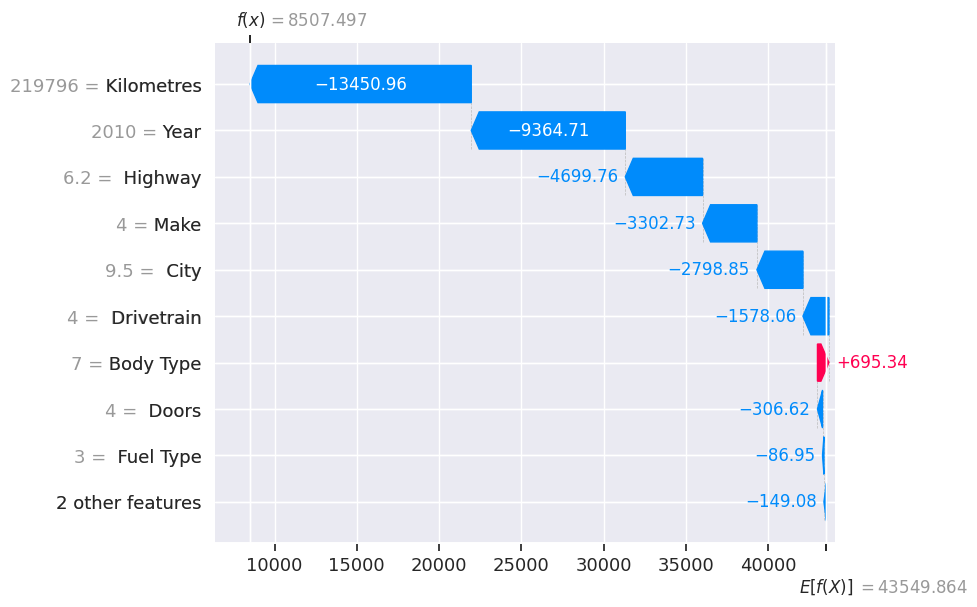

In [90]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

# AdaBoost Regressor

In [91]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define AdaBoostRegressor model
abr = AdaBoostRegressor()

# Define hyperparameters and possible values
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.01, 0.1, 1, 10]}

# Perform GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(abr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'n_estimators': 50}


In [92]:
from sklearn.ensemble import RandomForestRegressor
abr = AdaBoostRegressor(random_state=0, learning_rate=0.1, n_estimators=50)
abr.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=0)

In [93]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = abr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 13226.4214679937
MAPE is 0.4016552419251784
MSE is 592275516.7974968
R2 score is 0.5825856253719508
RMSE score is 24336.711297903355


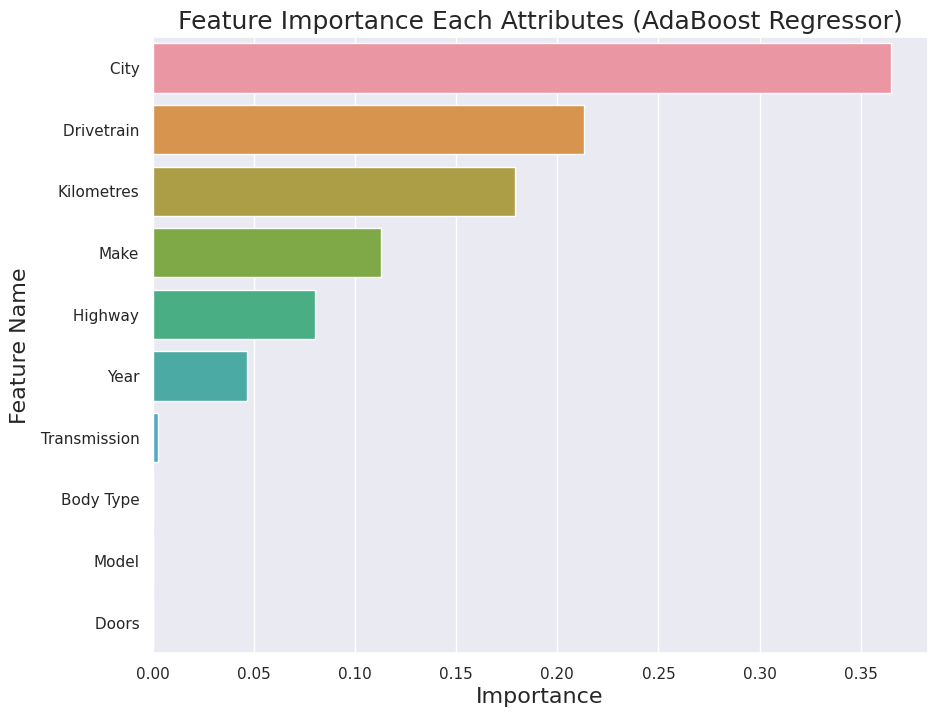

In [94]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": abr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()